<a href="https://colab.research.google.com/github/suuungwoo/scikit-learn-Tutorials/blob/master/An_introduction_to_machine_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learnによる機械学習
## サンプルデータセットのロード

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

## 学習と予測

In [0]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [0]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.predict(digits.data[-1:])

array([8])

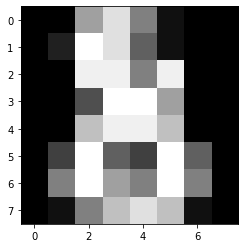

In [0]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[:][-1], cmap='gray')

## モデルの永続化

In [0]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='scale')
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
import pickle

s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [0]:
y[0:1]

array([0])

In [0]:
from joblib import dump, load

dump(clf, 'filename.joblib')

['filename.joblib']

In [0]:
clf3 = load('filename.joblib')
print(clf3.predict(X[1:2]))
y[2]

[0]


0

## 規約
### 型キャスト

In [0]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
print(X.dtype)
X = np.array(X, dtype='float32')
print(X.dtype)

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

float64
float32


dtype('float64')

In [0]:
clf.fit(iris.data, iris.target)
print(clf.predict(iris.data[:3]))

clf.fit(iris.data, iris.target_names[iris.target])
print(clf.predict(iris.data[:3]))

[0 0 0]
['setosa' 'setosa' 'setosa']


### パラメータの再設定と更新

In [0]:
X, y = datasets.load_iris(return_X_y=True)

In [0]:
clf.set_params(kernel='linear').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.set_params(kernel='rbf', gamma='scale').fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### マルチクラスとマルチラベルのフィッティング

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

clf =  OneVsRestClassifier(estimator=svm.SVC(gamma='scale', random_state=0))
clf.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [0]:
y = LabelBinarizer().fit_transform(y)
print(y)
clf.fit(X, y).predict(X)

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
print(y)
clf.fit(X,y).predict(X)

[[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 1]]


array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])